In [33]:
import pandas as pd
import numpy as np


import seaborn as sns

import sklearn.datasets as data


In [36]:
wine = data.load_wine()

In [37]:
type(wine)

sklearn.utils.Bunch

In [38]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [48]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine_type'] = wine.target

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
wine_type                       178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


In [50]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


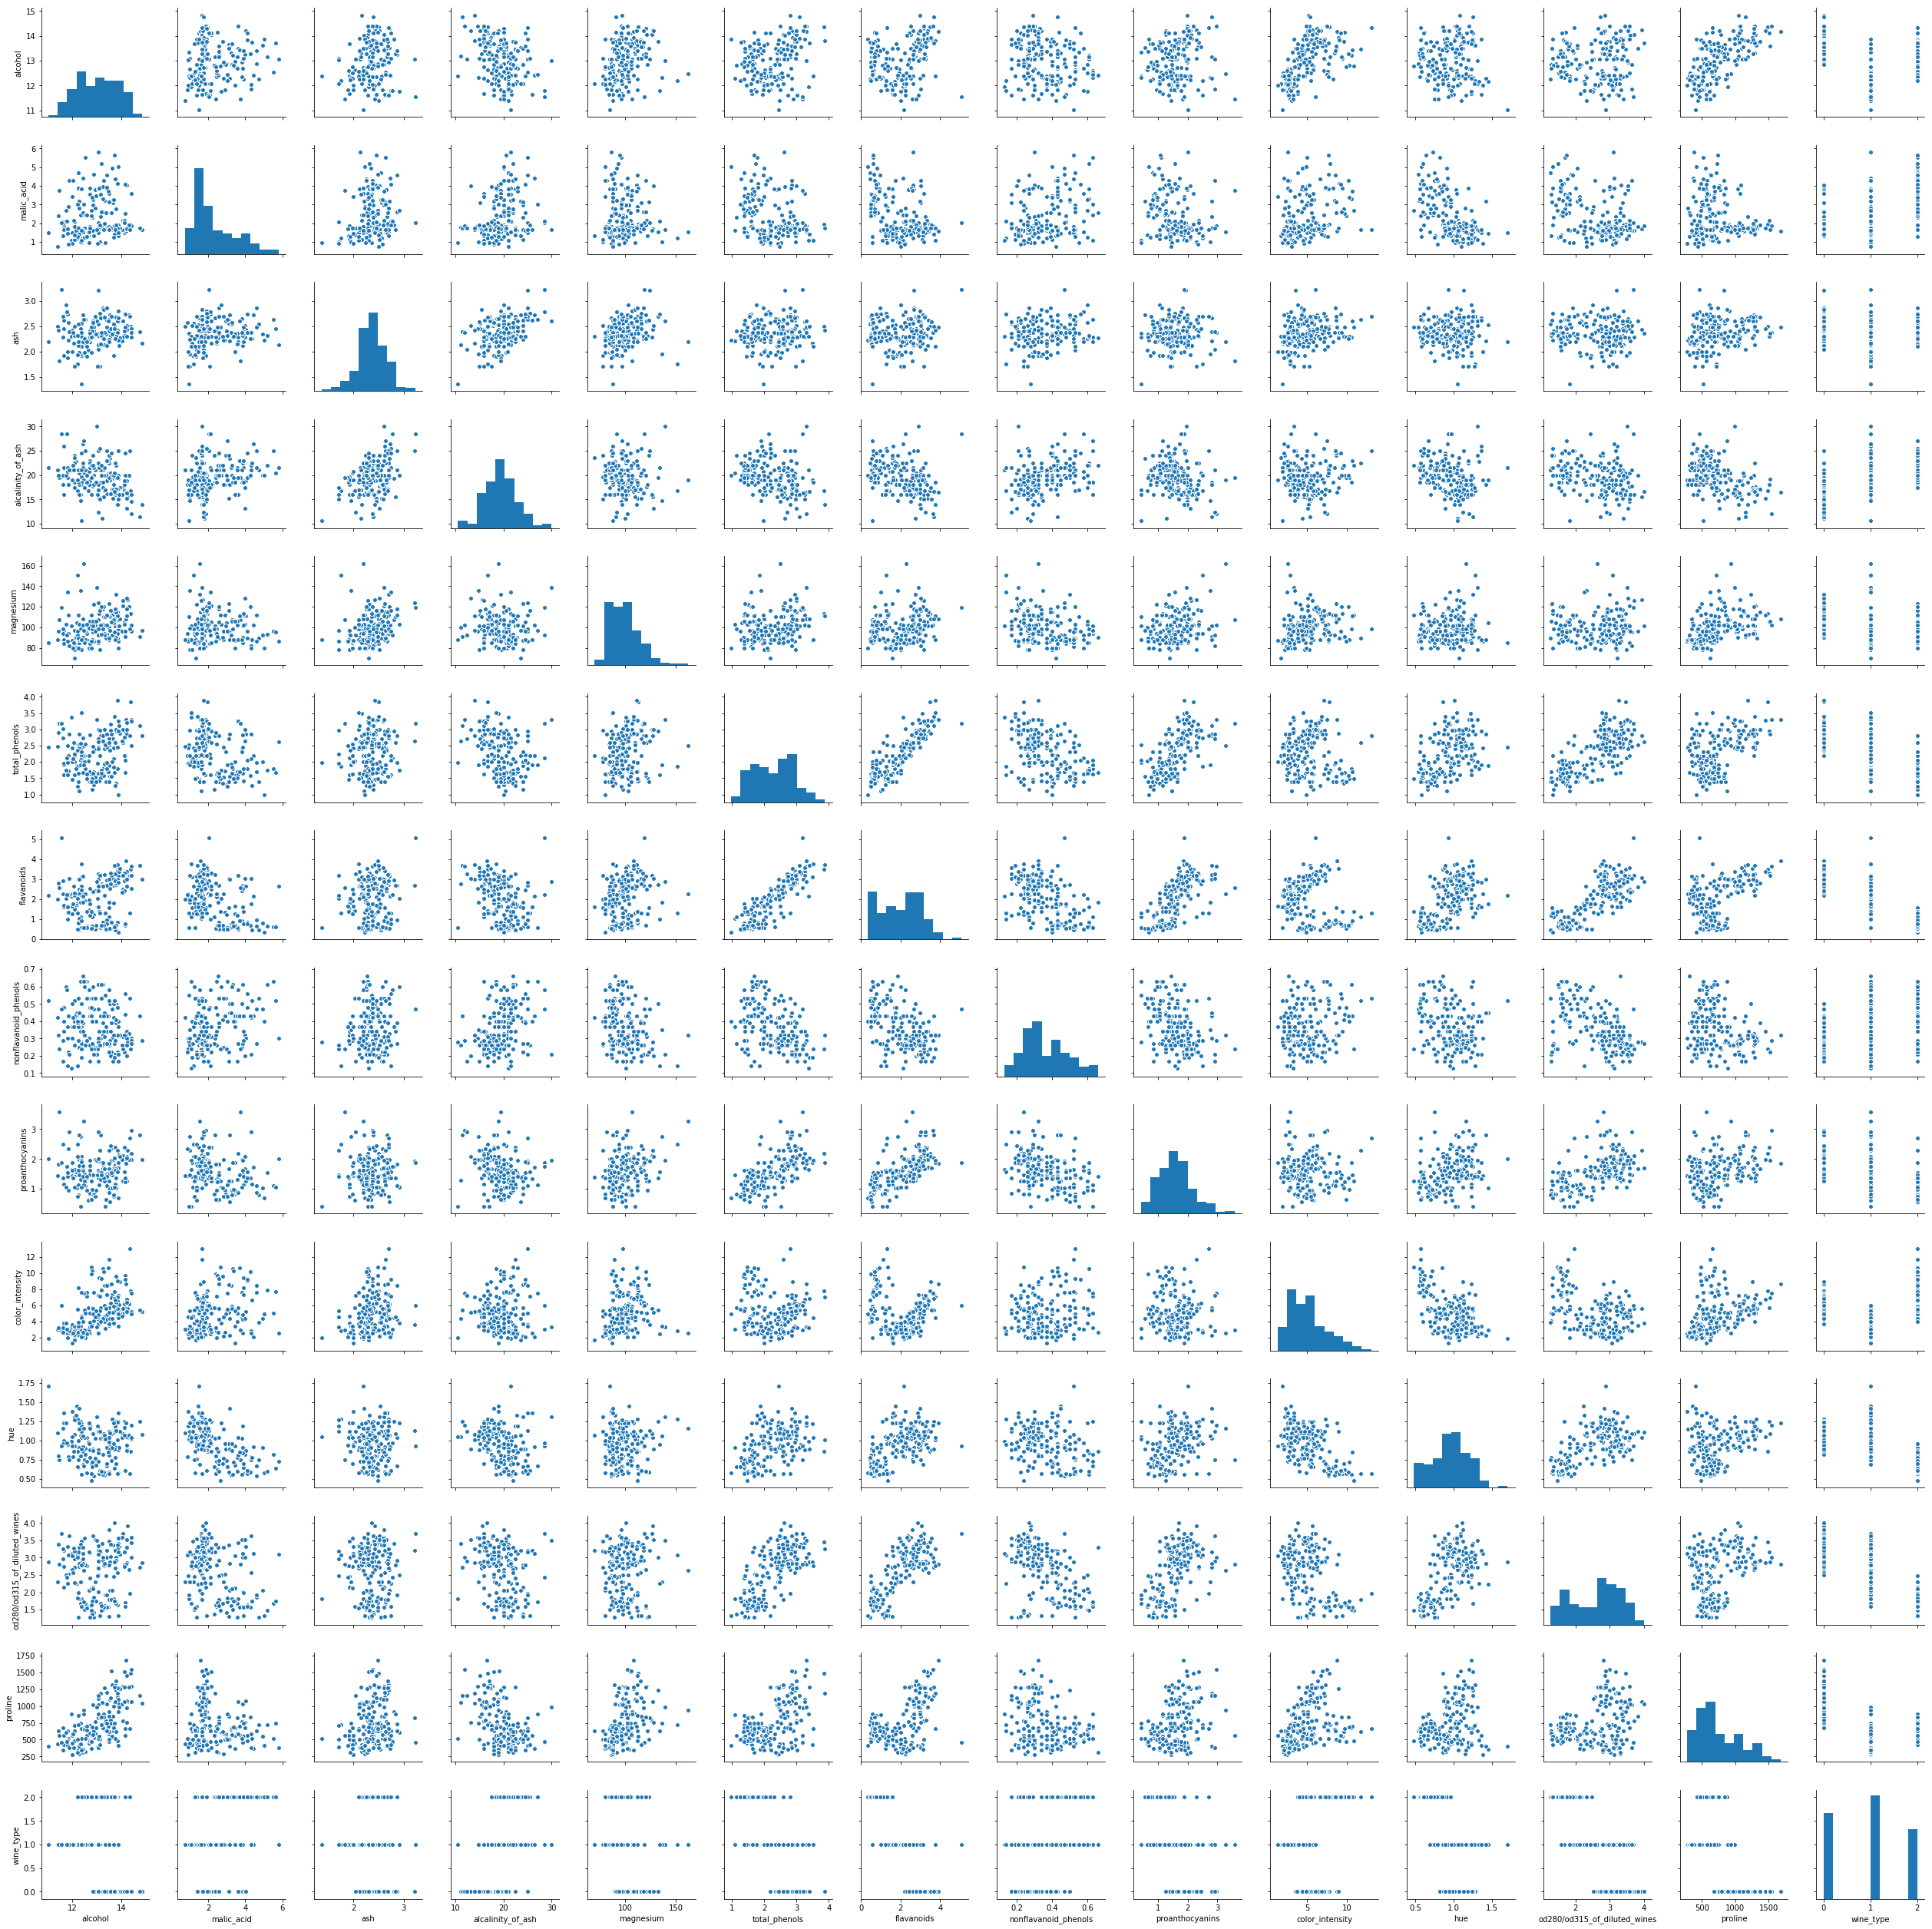

In [34]:
sns.pairplot(df)

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
reg = LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
X = df[['proline']]
y = df['alcohol']

In [61]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
pred=reg.predict(X)

In [64]:
from sklearn import metrics

In [65]:
metrics.r2_score(y, pred)

0.4143754862647204

In [67]:
X = df.drop(['alcohol', 'wine_type'], axis=1)

In [68]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
pred=reg.predict(X)

In [71]:
metrics.r2_score(y, pred)

0.5935573146395275

# Logistic Regression

In [87]:
X = df.drop('wine_type', axis=1)
# X = df[['proline']]
y = df['wine_type']

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
clf= LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
pred = clf.predict(X)

In [92]:
metrics.accuracy_score(y, pred)

0.9719101123595506

# K-Nearest Neighbors

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [160]:
clf = KNeighborsClassifier()
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [161]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [162]:
X = df[['proline']]
y = df['wine_type']

In [163]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [164]:
pred = clf.predict(X)

In [165]:
metrics.accuracy_score(y, pred)

0.7696629213483146

In [166]:
X = df.drop('wine_type', axis=1)
y = df['wine_type']

In [167]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [168]:
pred = clf.predict(X)

In [169]:
metrics.accuracy_score(y, pred)

0.7865168539325843

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
pre = StandardScaler()
pre

StandardScaler(copy=True, with_mean=True, with_std=True)

In [172]:
X = pre.fit_transform(X)

In [173]:
clf.fit(X,y)
pred = clf.predict(X)
metrics.accuracy_score(y, pred)

0.9775280898876404

# Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [128]:
X = df[['proline']]
y = df['wine_type']

In [129]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
pred = clf.predict(X)

In [132]:
metrics.accuracy_score(y, pred)

0.8876404494382022

In [135]:
X = df.drop('wine_type', axis=1)
y = df['wine_type']

In [136]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [137]:
pred = clf.predict(X)

In [138]:
metrics.accuracy_score(y, pred)

1.0

# Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [186]:
X = df[['proline']]
y = df['wine_type']

In [187]:
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [188]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [189]:
pred= clf.predict(X)
metrics.accuracy_score(y, pred)

0.8707865168539326

In [190]:
X = df.drop('wine_type', axis=1)

In [191]:
clf.fit(X, y)
pred = clf.predict(X)
metrics.accuracy_score(y, pred)

1.0

# K-Means Clustering

In [192]:
from sklearn.cluster import KMeans

In [195]:
clu = KMeans(n_clusters=3)
clu

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [196]:
clu.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [198]:
pred = clu.predict(X)

In [199]:
pd.crosstab(y, pred)

col_0,0,1,2
wine_type,,,
0,0,46,13
1,50,1,20
2,19,0,29


In [201]:
df['pred'] = pred

In [204]:
df['pred'] = df['pred'].replace({1:0, 0:1})

In [205]:
pd.crosstab(y, df['pred'])

pred,0,1,2
wine_type,,,
0,46,0,13
1,1,50,20
2,0,19,29


In [206]:
metrics.accuracy_score(y,df['pred'] )

0.702247191011236

# K-means

In [207]:
from sklearn.cluster import KMeans

In [218]:
clu = KMeans(n_clusters=3)
clu

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [219]:
clu.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [222]:
pred = clu.predict(X)

In [223]:
X['pred'] = pred